#Integrantes
Gabriel Alves Reis - 2020006507

Samuel Brísio Jesus - 2020085547

Raphaela Maria Costa e Silva - 2020006973


In [1]:
! pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import math

In [3]:
@jit(nopython=True) 
def calcEnergia(viz, s, i):
    if(s[viz[i,0]] == 2):
       return 2
    if(s[viz[i,1]] == 2):
       return -1
    if(s[viz[i,2]] == 2):
       return -1
    if(s[viz[i,3]]  == 2):
       return 2

    else: return 1

@jit(nopython=True) 
def vizinhos(N):
    L=int(np.sqrt(N))
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: viz[k,0] = k+1-L
        viz[k,1] = k+L
        if k > (N-L-1): viz[k,1] = k+L-N
        viz[k,2] = k-1
        if (k % L == 0): viz[k,2] = k+L-1
        viz[k,3] = k-L
        if k < L: viz[k,3] = k+N-L
    return viz

In [64]:
#@jit(nopython=True) 
def ising(sistema, pAdoecer, pRecuperar, viz, plotar):
    numIter = 0
    N = sistema.shape[0]
    qtdRecuperados = 0
    qtdNormais = N-1
    qtdDoentes = 1
    arrayRecuperados = [qtdRecuperados]
    arrayNormais = [qtdNormais]
    arrayDoentes = [qtdDoentes]
    
    while(2 in sistema):
        copySistema = np.copy(sistema)
        for i in range(N):
            de = calcEnergia(viz, copySistema,i) 
            if (np.random.random() < pAdoecer and de == 2 and copySistema[i] == 0):
                qtdDoentes +=1
                qtdNormais -= 1
                sistema[i] = 2
            if (np.random.random() < pRecuperar and copySistema[i] == 2):
                sistema[i] = 1
                qtdDoentes -=1
                qtdRecuperados+=1
        if(numIter in plotar):
            listaX = []
            listaY = []
            for i in range(0, int(math.sqrt(N))):
                for j in range(0, int(math.sqrt(N))):
                    listaX = listaX + [i]
                    listaY = listaY + [j]
            status = []
            for i in range(0, N):
                status = status + [sistema[i]]

            plt.scatter(listaX, listaY, s=100, c=status, cmap='inferno')
            plt.show()

        numIter += 1
        arrayRecuperados = arrayRecuperados + [qtdRecuperados]
        arrayNormais = arrayNormais + [qtdNormais]
        arrayDoentes = arrayDoentes + [qtdDoentes]
        '''
        for i in range(0, int(math.sqrt(N))) :
            for j in range(0, int(math.sqrt(N))) :
                print(int(sistema[iter]), " " , end="")
                iter += 1
            print('')
        print("---------------------------------------------------------------------------")
        '''
    return numIter, arrayRecuperados, arrayNormais, arrayDoentes
  

In [50]:
def monteCarlo(L, pAdoecer, pRecuperar, plotar):
    N = L**2
    iter = 0
    sistema = np.zeros(N)
    vitima0 = np.random.randint(0,N-1)
    sistema[vitima0] = 2
    viz = vizinhos(N)

    '''
    for i in range(0, int(math.sqrt(N))) :
        for j in range(0, int(math.sqrt(N))) :
            print(int(sistema[iter]), " " , end="")
            iter += 1
        print('')
    print("---------------------------------------------------------------------------")
    ''' 
    numIter, recup, normal, doentes = ising(sistema, pAdoecer, pRecuperar, viz, plotar)
    lista = list(range(0,numIter+1))

    return lista, recup, normal, doentes


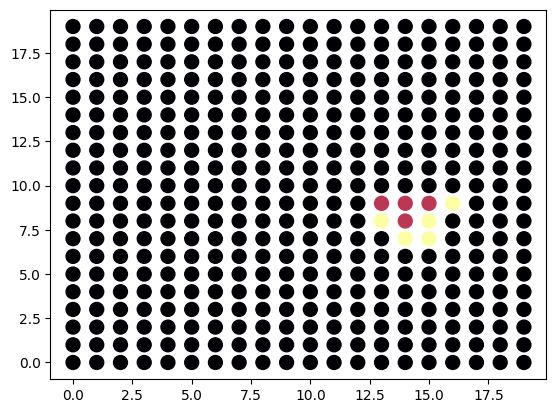

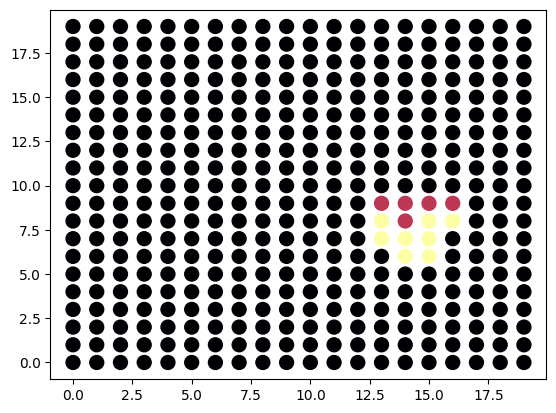

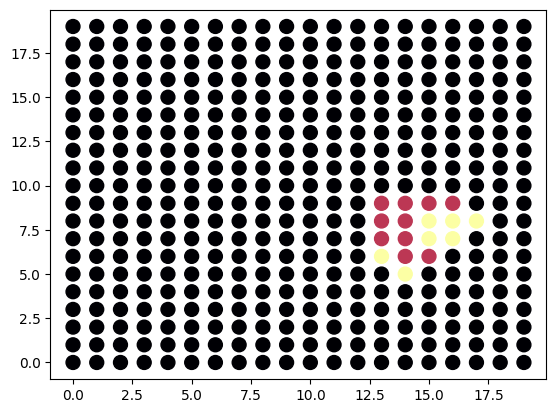

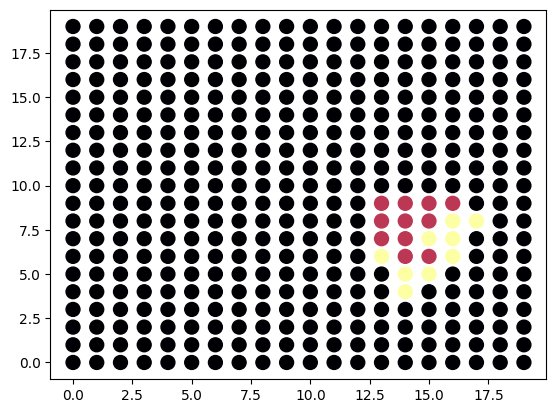

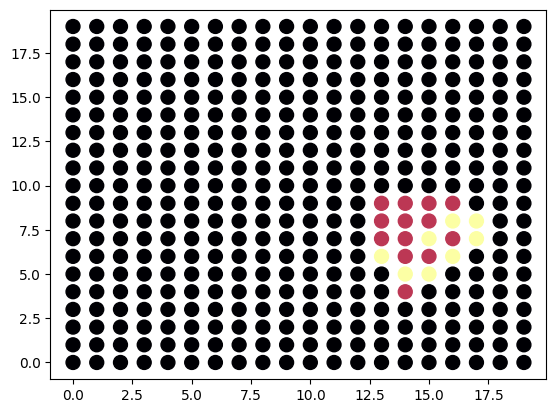

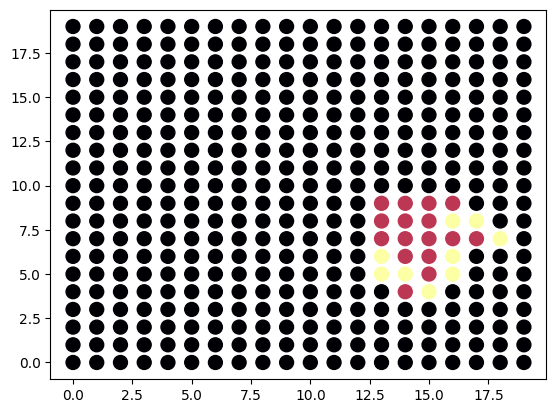

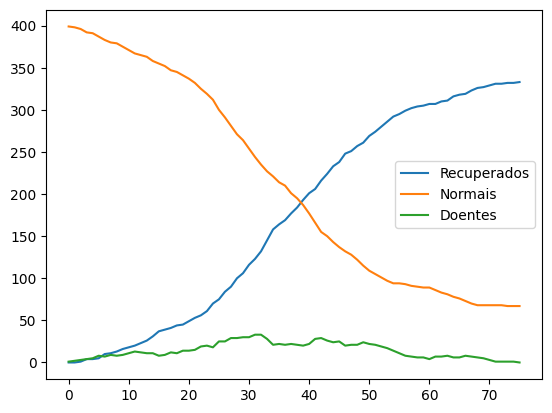

In [67]:
lista, recp, normal, doentes = monteCarlo(20, 0.5, 0.3, [3,4,5,6,7,8])
plt.plot(lista, recp, label='Recuperados')
plt.plot(lista, normal, label='Normais')
plt.plot(lista, doentes, label='Doentes')

leg = plt.legend();
plt.show()